In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from cartopy import config
import cartopy.crs as ccrs
from netCDF4 import num2date,date2num,Dataset


In [3]:
from marcus_py_tools import walklevel,latlon_from_xy
import pyart.graph.cm as pcm


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
import pyproj

In [4]:
filenm = 'Tgrid_020.nc'
nc = Dataset(filenm,'r')
zhh = nc.variables['reflectivity'][0,:,:,:]
xd  = nc.variables['x'][:]
yd  = nc.variables['y'][:]
zd  = nc.variables['z'][:]
rlat = nc.variables['radar_latitude'][0]
rlon = nc.variables['radar_longitude'][0]
nc.close()
#lats,lons = latlon_form_xy()

In [5]:
lats,lons = latlon_from_xy(xd,yd,rlat,rlon)

In [7]:
print(zd)

[    0.   500.  1000.  1500.  2000.  2500.  3000.  3500.  4000.  4500.
  5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000. 10500. 11000. 11500. 12000. 12500. 13000. 13500. 14000. 14500.
 15000.]


In [8]:
#..Define some fields from the reflectivity
zhh_3km = zhh[6,:,:]
zhh_comp = zhh.max(axis=0)
zhh_int2to8 = zhh[4:17,:,:].sum(axis=0)

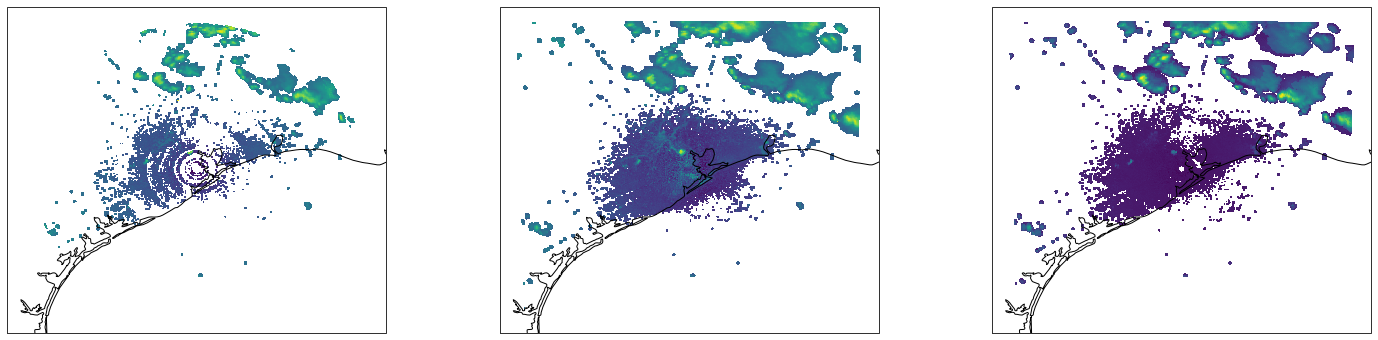

In [13]:
fig = plt.figure(figsize=(25,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax0 = fig.add_subplot(1,3,1,projection=ccrs.PlateCarree())
ax0.pcolormesh(lons, lats, zhh_3km,
             transform=ccrs.PlateCarree())

ax0.coastlines()
ax1 = fig.add_subplot(1,3,2,projection=ccrs.PlateCarree())
ax1.pcolormesh(lons, lats, zhh_comp,
             transform=ccrs.PlateCarree())

ax1.coastlines()
ax2 = fig.add_subplot(1,3,3,projection=ccrs.PlateCarree())
ax2.pcolormesh(lons, lats, zhh_int2to8,
             transform=ccrs.PlateCarree())

ax2.coastlines()
#plt.show()


In [16]:
#..do a bit more processing to see if we can pick up something more
zhh_m10dBz = np.ma.masked_where(zhh<10.,zhh)
#..Now the same things
zhh_m_3km = zhh_m10dBz[6,:,:]
zhh_m_comp = zhh_m10dBz.max(axis=0)
zhh_m_int2to8 = zhh_m10dBz[4:17,:,:].sum(axis=0)

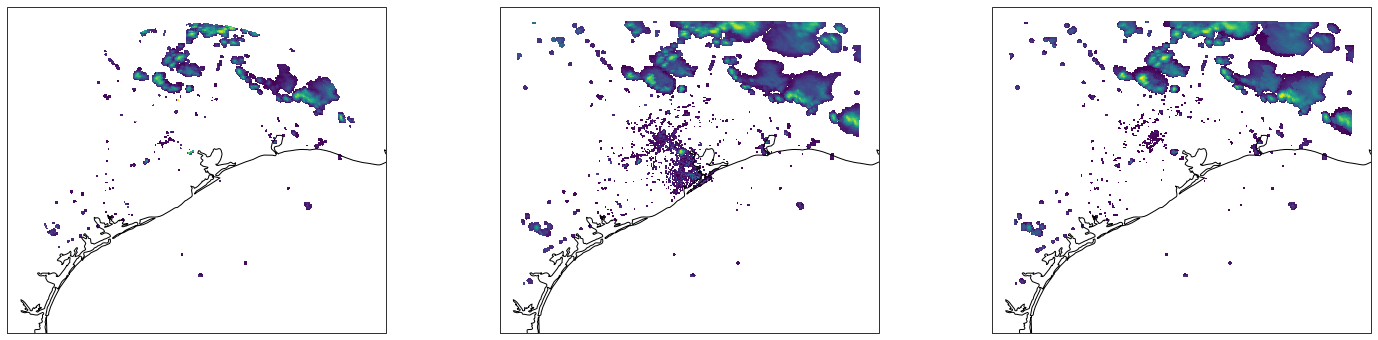

In [17]:
fig = plt.figure(figsize=(25,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax0 = fig.add_subplot(1,3,1,projection=ccrs.PlateCarree())
ax0.pcolormesh(lons, lats, zhh_m_3km,
             transform=ccrs.PlateCarree())

ax0.coastlines()
ax1 = fig.add_subplot(1,3,2,projection=ccrs.PlateCarree())
ax1.pcolormesh(lons, lats, zhh_m_comp,
             transform=ccrs.PlateCarree())

ax1.coastlines()
ax2 = fig.add_subplot(1,3,3,projection=ccrs.PlateCarree())
ax2.pcolormesh(lons, lats, zhh_m_int2to8,
             transform=ccrs.PlateCarree())

ax2.coastlines()
#plt.show()

In [18]:
filenm = 'Tgrid_020.nc'
nc = Dataset(filenm,'r')
zdr = nc.variables['differential_reflectivity'][0,:,:,:]
nc.close()
#..do a bit even more processing to see if we can pick up something more
zhh_mmore = np.ma.masked_where(zdr<0.5,zhh_m10dBz)
#..Now the same things
zhh_mm_3km = zhh_mmore[6,:,:]
zhh_mm_comp = zhh_mmore.max(axis=0)
zhh_mm_int2to8 = zhh_mmore[4:17,:,:].sum(axis=0)

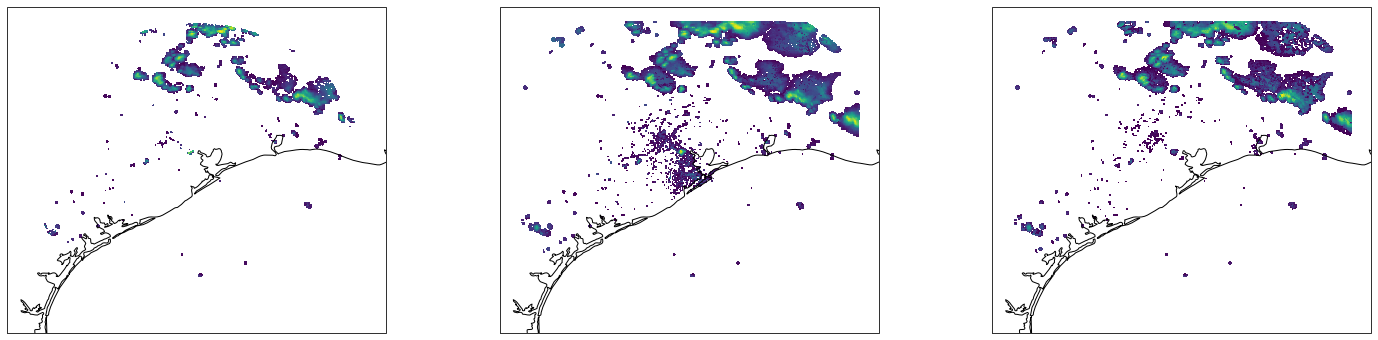

In [19]:
fig = plt.figure(figsize=(25,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax0 = fig.add_subplot(1,3,1,projection=ccrs.PlateCarree())
ax0.pcolormesh(lons, lats, zhh_mm_3km,
             transform=ccrs.PlateCarree())

ax0.coastlines()
ax1 = fig.add_subplot(1,3,2,projection=ccrs.PlateCarree())
ax1.pcolormesh(lons, lats, zhh_mm_comp,
             transform=ccrs.PlateCarree())

ax1.coastlines()
ax2 = fig.add_subplot(1,3,3,projection=ccrs.PlateCarree())
ax2.pcolormesh(lons, lats, zhh_mm_int2to8,
             transform=ccrs.PlateCarree())

ax2.coastlines()
#plt.show()